In [ ]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
tf.random.set_seed(221)


# tf.debugging.set_log_device_placement(True)
# import warnings
# warnings.filterwarnings('ignore')

In [1]:
print(tf.random.uniform([1], seed=1))  # generates 'A1'
print(tf.random.uniform([1], seed=1))  # generates 'A2'

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data.zip" -d "/content/09_rsna_atd"

Streaming output truncated to the last 5000 lines.
  inflating: /content/09_rsna_atd/data/train_images/10917/30843/235.png  
  inflating: /content/09_rsna_atd/__MACOSX/data/train_images/10917/30843/._235.png  
  inflating: /content/09_rsna_atd/data/train_images/10917/30843/234.png  
  inflating: /content/09_rsna_atd/__MACOSX/data/train_images/10917/30843/._234.png  
  inflating: /content/09_rsna_atd/data/train_images/10917/30843/220.png  
  inflating: /content/09_rsna_atd/__MACOSX/data/train_images/10917/30843/._220.png  
  inflating: /content/09_rsna_atd/data/train_images/10917/30843/208.png  
  inflating: /content/09_rsna_atd/__MACOSX/data/train_images/10917/30843/._208.png  
  inflating: /content/09_rsna_atd/data/train_images/10917/30843/181.png  
  inflating: /content/09_rsna_atd/__MACOSX/data/train_images/10917/30843/._181.png  
  inflating: /content/09_rsna_atd/data/train_images/10917/30843/195.png  
  inflating: /content/09_rsna_atd/__MACOSX/data/train_images/10917/30843/._195.p

In [ ]:
# data = '/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data'
data = '/content/09_rsna_atd/data'

In [ ]:
pic_paths = glob.glob(os.path.join(data, 'train_images', '*', '*', '*.png'))

In [ ]:
df_data_label = pd.read_csv(os.path.join(data, 'train.csv'))

In [ ]:
df_data_label.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,image_path,width,height
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,362,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,363,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,364,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,365,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,366,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512


In [ ]:
# data = '/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data'
pic_path = glob.glob(os.path.join(data, 'train_images', '*', '*', '*.png'))

df_data_label = pd.read_csv(os.path.join(data, 'train.csv'))
df_data_label['image_path']= df_data_label['image_path'].str.replace("/kaggle/input/rsna-2023-abdominal-trauma-detection/",
                                                                     '/content/09_rsna_atd/data/', regex=False)
df_data_label['image_path']= df_data_label['image_path'].str.replace(".dcm", '.png', regex= False)

In [ ]:
df_data_label.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,image_path,width,height
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,362,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,363,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,364,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,365,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,366,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512


In [ ]:
df_data = df_data_label[['image_path', 'bowel_injury', 'extravasation_injury',
                         'kidney_healthy', 'kidney_low','kidney_high',
                         'liver_healthy',	'liver_low',	'liver_high',
                         'spleen_healthy',	'spleen_low',	'spleen_high',
                         ]].drop_duplicates()

In [ ]:
df_data.dtypes

bowel_injury            int64
extravasation_injury    int64
kidney_healthy          int64
kidney_low              int64
kidney_high             int64
liver_healthy           int64
liver_low               int64
liver_high              int64
spleen_healthy          int64
spleen_low              int64
spleen_high             int64
dtype: object

In [ ]:
df_data['bowel_injury'] = df_data['bowel_injury'].astype(str)
df_data['extravasation_injury'] = df_data['extravasation_injury'].astype(str)
# df_data['']

In [ ]:
# df_data = df_data_label[['bowel_injury', 'image_path']].drop_duplicates()
# df_data['bowel_injury']= df_data['bowel_injury'].astype(str)



# df_data['image_path'][0]

In [ ]:
df_train, df_test = train_test_split(df_data, test_size=0.2)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   # validation_split=0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory=None,
    x_col='image_path',
    y_col= 'bowel_injury',
    # y_col=['bowel_injury', 'extravasation_injury'],
    #        'kidney_healthy', 'kidney_low','kidney_high',
    #        'liver_healthy',	'liver_low',	'liver_high',
    #        'spleen_healthy',	'spleen_low',	'spleen_high'],
    # weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    # class_mode='multi_output',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=1,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    # subset='training',
    interpolation='nearest',
    validate_filenames=True)

Found 9228 validated image filenames belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe = df_test,
    directory=None,
    x_col='image_path',
    y_col = 'bowel_injury',
    # y_col=['bowel_injury', 'extravasation_injury'],
          #  'kidney_healthy', 'kidney_low','kidney_high',
          #  'liver_healthy',	'liver_low',	'liver_high',
          #  'spleen_healthy',	'spleen_low',	'spleen_high'],
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    # class_mode='multi_output',
    class_model = 'binary',
    batch_size=32,
    shuffle=True,
    seed=1,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    # subset='validation',
    interpolation='nearest',
    validate_filenames=True)

Found 2308 validated image filenames belonging to 2 classes.


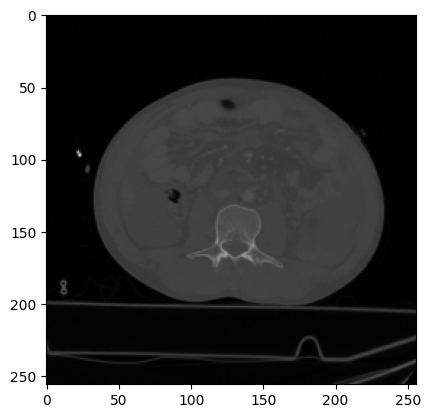

In [ ]:
image = validation_generator.next()
plt.imshow(image[0][0])
plt.show()

In [ ]:

from tensorflow.keras.optimizers.legacy import RMSprop
# compile a model

def build_model():
  inputs = tf.keras.Input(shape =(256,256,3))
  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(inputs)
  x = tf.keras.layers.MaxPooling2D(2, 2)(x)
  # The second convolution
  x= tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  # The third convolution
  x= tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
  x= tf.keras.layers.MaxPooling2D(2,2)(x)
  # The fourth convolution
  x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  # The fifth convolution
  x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  # Flatten the results to feed into a DNN
  x = tf.keras.layers.Flatten()(x)
  # 512 neuron hidden layer
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  y = tf.keras.layers.Dense(1, activation='sigmoid')(x)
  model = tf.keras.Model(inputs=inputs, outputs= y)

  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

  return model

In [ ]:
model= build_model()

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers.legacy import RMSprop


history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator)

Epoch 1/15
289/289 [==============================] - 167s 538ms/step - loss: 0.6892 - accuracy: 0.5380 - val_loss: 0.7344 - val_accuracy: 0.5000
Epoch 2/15
289/289 [==============================] - 152s 526ms/step - loss: 0.6462 - accuracy: 0.6195 - val_loss: 0.7870 - val_accuracy: 0.5000
Epoch 3/15
289/289 [==============================] - 149s 514ms/step - loss: 0.5978 - accuracy: 0.6802 - val_loss: 0.8257 - val_accuracy: 0.5000
Epoch 4/15
289/289 [==============================] - 148s 513ms/step - loss: 0.5616 - accuracy: 0.7085 - val_loss: 1.1880 - val_accuracy: 0.5000
Epoch 5/15
289/289 [==============================] - 148s 512ms/step - loss: 0.5212 - accuracy: 0.7388 - val_loss: 1.2994 - val_accuracy: 0.5000
Epoch 6/15
289/289 [==============================] - 148s 513ms/step - loss: 0.4790 - accuracy: 0.7734 - val_loss: 1.3638 - val_accuracy: 0.5000
Epoch 7/15
289/289 [==============================] - 150s 517ms/step - loss: 0.4473 - accuracy: 0.7936 - val_loss: 1.9850 -

In [ ]:
x = gap(x)

    # Define 'necks' for each head
    x_bowel = keras.layers.Dense(32, activation='silu')(x)
    x_extra = keras.layers.Dense(32, activation='silu')(x)
    x_liver = keras.layers.Dense(32, activation='silu')(x)
    x_kidney = keras.layers.Dense(32, activation='silu')(x)
    x_spleen = keras.layers.Dense(32, activation='silu')(x)

    # Define heads
    out_bowel = keras.layers.Dense(1, name='bowel', activation='sigmoid')(x_bowel) # use sigmoid to convert predictions to [0-1]
    out_extra = keras.layers.Dense(1, name='extra', activation='sigmoid')(x_extra) # use sigmoid to convert predictions to [0-1]
    out_liver = keras.layers.Dense(3, name='liver', activation='softmax')(x_liver) # use softmax for the liver head
    out_kidney = keras.layers.Dense(3, name='kidney', activation='softmax')(x_kidney) # use softmax for the kidney head
    out_spleen = keras.layers.Dense(3, name='spleen', activation='softmax')(x_spleen) # use softmax for the spleen head

    # Concatenate the outputs
    outputs = [out_bowel, out_extra, out_liver, out_kidney, out_spleen]

Epoch 1/15
 22/289 [=>............................] - ETA: 2:02 - loss: 0.6985 - accuracy: 0.5057

KeyboardInterrupt: ignored

In [ ]:
# model.evaluate(test_images, test_labels)
# classifications = model.predict(test_images)
# print(classifications[0])
# print(test_labels[0])

# the following is to generate the graph

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Inception Network: Transfer Learning

In [ ]:
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(256, 256, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d_5[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [ ]:
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.3)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(pre_trained_model.input, x)

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
# with tf.device('/CPU:0'):
model.compile(loss='binary_crossentropy',
          # optimizer=RMSprop(learning_rate=0.001),  # 0.001 is the default optimizer
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])
#
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
289/289 [==============================] - 160s 539ms/step - loss: 0.5314 - accuracy: 0.7406 - val_loss: 0.3209 - val_accuracy: 0.8627
Epoch 2/15
289/289 [==============================] - 154s 533ms/step - loss: 0.3918 - accuracy: 0.8246 - val_loss: 0.2714 - val_accuracy: 0.8843
Epoch 3/15
289/289 [==============================] - 156s 538ms/step - loss: 0.3458 - accuracy: 0.8503 - val_loss: 0.2365 - val_accuracy: 0.9099
Epoch 4/15
289/289 [==============================] - 153s 531ms/step - loss: 0.3273 - accuracy: 0.8546 - val_loss: 0.1917 - val_accuracy: 0.9233
Epoch 5/15
289/289 [==============================] - 153s 528ms/step - loss: 0.2948 - accuracy: 0.8703 - val_loss: 0.1752 - val_accuracy: 0.9307
Epoch 6/15
289/289 [==============================] - 151s 524ms/step - loss: 0.2750 - accuracy: 0.8817 - val_loss: 0.1816 - val_accuracy: 0.9359
Epoch 7/15
289/289 [==============================] - 153s 528ms/step - loss: 0.2653 - accuracy: 0.8851 - val_loss: 0.1992 -

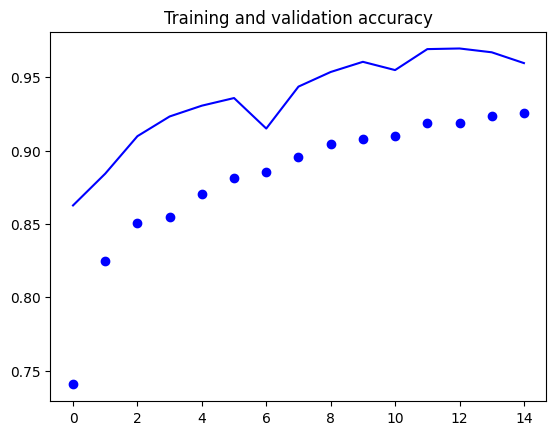

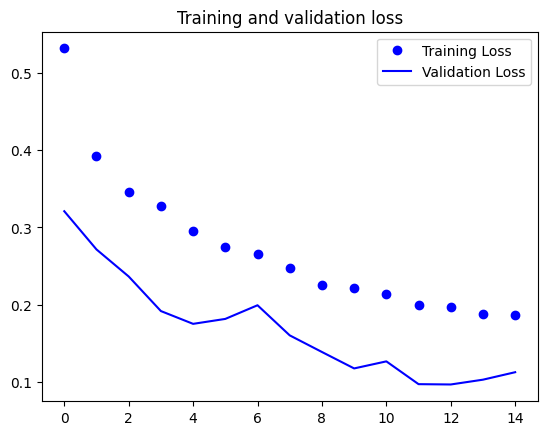

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()